<a href="https://colab.research.google.com/github/Dubeyshruti/Music-Recommendation-system/blob/main/music_recommendation_iynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# New Section


   **Spotify Song's Genre Segmentation**


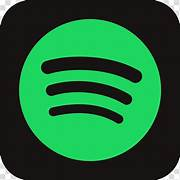

**Spotify is a digital music, podcast, and video service that gives you access to millions of songs and other content from creators all over the world.**

**Basic functions such as playing music are totally free, but you can also choose to upgrade to Spotify Premium.**

**Whether you have Premium or not, you can:**

**✴ Get recommendations based on your taste**

**✴ Build collections of music and podcasts**

 **And more! **

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/spotify dataset.csv")
df.head(3)


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616


In [ ]:
df = df.dropna()

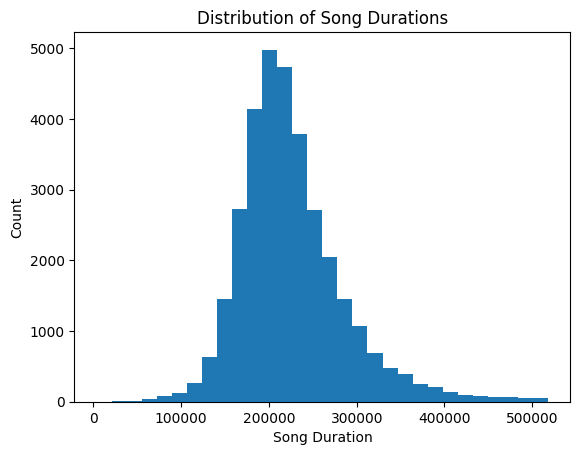

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(df['duration_ms'], bins=30)
plt.xlabel('Song Duration')
plt.ylabel('Count')
plt.title('Distribution of Song Durations')
plt.show()



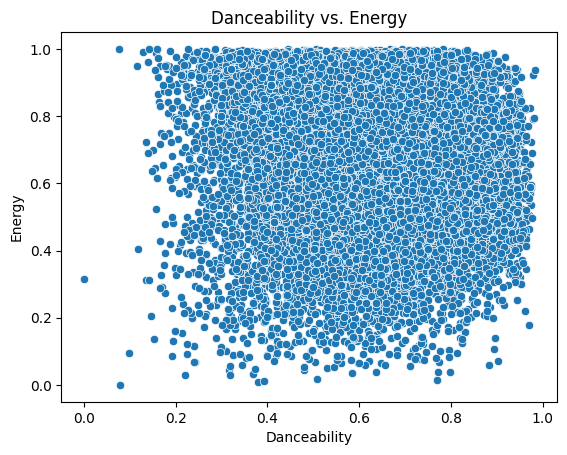

In [ ]:
sns.scatterplot(data=df, x='danceability', y='energy')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Danceability vs. Energy')
plt.show()


<ipython-input-7-192c6e2115e5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


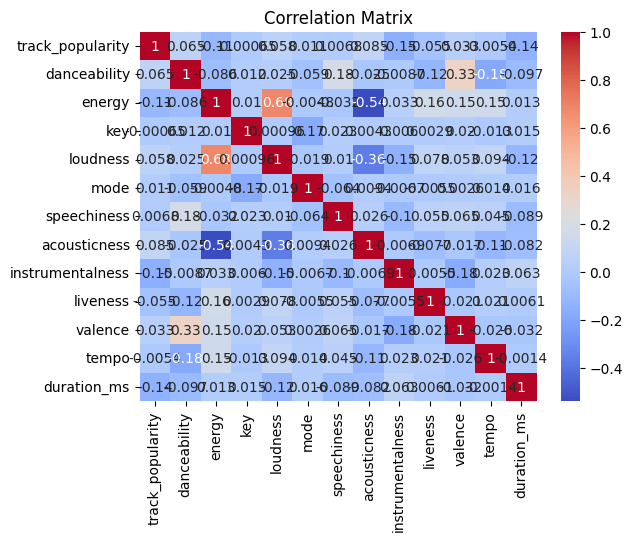

In [ ]:
correlation_matrix = df.corr()

# Plot the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


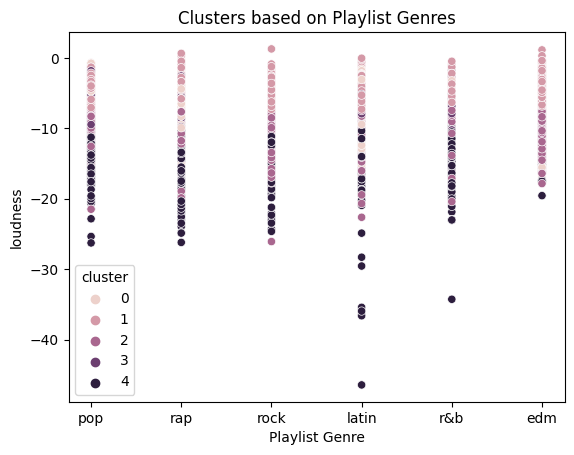

In [ ]:
# Import the necessary libraries for clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare the data for clustering
X = df[['loudness', 'speechiness', 'acousticness']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform clustering using K-means algorithm
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_scaled)

# Add cluster labels to the dataset
df['cluster'] = kmeans.labels_

# Plot clusters based on playlist genres
sns.scatterplot(data=df, x='playlist_genre', y='loudness', hue='cluster')
plt.xlabel('Playlist Genre')
plt.ylabel('loudness')
plt.title('Clusters based on Playlist Genres')
plt.show()



In [ ]:
# Import the necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Prepare the data for content-based recommendation
corpus = df['playlist_genre']
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

# Calculate the similarity matrix
similarity_matrix = cosine_similarity(X)

# Function to recommend similar playlists based on a given playlist
def recommend_playlists(playlist_index, num_recommendations):
    playlist_similarity = similarity_matrix[playlist_index]
    similar_playlists_indices = playlist_similarity.argsort()[::-1][1:num_recommendations+1]
    similar_playlists = df.loc[similar_playlists_indices]['playlist_name']
    return similar_playlists

# Example usage: Recommend 5 similar playlists to the playlist at index 0
recommendations = recommend_playlists(0, 5)
print(recommendations)


3668    80's Songs | Top 💯 80s Music Hits
3676            GTA V - Radio Mirror Park
3675            GTA V - Radio Mirror Park
3674            GTA V - Radio Mirror Park
3673    80's Songs | Top 💯 80s Music Hits
Name: playlist_name, dtype: object
